In [2]:
# import libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# define functions
# calculate index of difficulty
def index_of_difficulty(key: tuple) -> float:
    return math.ceil(math.log2(key[1] / key[0]) + 1)

In [4]:
# import data
headers = ['size', 'distance', 'direction', 'time', 'errors']
participant_1 = pd.read_csv('data/participant1.csv', names=headers)
participant_6 = pd.read_csv('data/participant6.csv', names=headers)
participant_7 = pd.read_csv('data/participant7.csv', names=headers)
participant_16 = pd.read_csv('data/participant16.csv', names=headers)
participant_21 = pd.read_csv('data/participant21.csv', names=headers)
participant_25 = pd.read_csv('data/participant25.csv', names=headers)
participant_69 = pd.read_csv('data/participant69.csv', names=headers)
participant_420 = pd.read_csv('data/participant420.csv', names=headers)
participant_1123 = pd.read_csv('data/participant1123.csv', names=headers)
participant_2003 = pd.read_csv('data/participant2003.csv', names=headers)
participant_2804 = pd.read_csv('data/participant2804.csv', names=headers)
participant_6904 = pd.read_csv('data/participant6904.csv', names=headers)
participant_149025 = pd.read_csv('data/participant149025.csv', names=headers)
participant_8008504 = pd.read_csv('data/participant8008504.csv', names=headers)

participants = [participant_1, participant_6, participant_7, participant_16, participant_21, participant_25, participant_69, participant_1123, participant_2003, participant_2804, participant_6904, participant_149025, participant_8008504]

# combine data
data = pd.concat([participant_1, participant_6, participant_7, participant_16, participant_21, participant_25, participant_69, participant_1123, participant_2003, participant_2804, participant_6904, participant_149025, participant_8008504])

data.describe()

,size,distance,direction,time,errors
count,4196.000000,4196.000000,4196.000000,4.196000e+03,4196.000000
mean,74.995234,188.512869,0.010963,3.664359e+06,0.069590
std,53.762600,134.489119,1.000059,7.904599e+07,0.279485
min,20.000000,50.000000,-1.000000,3.023541e-01,0.000000
25%,20.000000,100.000000,-1.000000,6.227365e-01,0.000000
50%,40.000000,200.000000,1.000000,8.162060e-01,0.000000
75%,160.000000,400.000000,1.000000,1.029452e+00,0.000000
max,160.000000,400.000000,1.000000,1.708408e+09,5.000000


In [5]:
# remove outliers
data = data[data['time'] < 5]

# Calculate the upper limit
upper_limit = data['time'].quantile(0.95)

# Filter the dataframe
data = data[data['time'] < upper_limit]


In [6]:
separated_data = {}
x = []
y = []

x1 = []
y1 = []

x2 = []
y2 = []

for val1 in data['size'].unique():
    for val2 in data['distance'].unique():
        for direction in data['direction'].unique():
            separated_data[(int(val1), int(val2), direction)] = data[(data['size'] == val1) & (data['distance'] == val2) & (data['direction'] == direction)]

for key in separated_data:
    x.append(index_of_difficulty(key))
    y.append(x[-1] / separated_data[key]['time'].mean())
    if key[2] == 1:
        x1.append(index_of_difficulty(key))
        y1.append(x1[-1] / separated_data[key]['time'].mean())
    else:
        x2.append(index_of_difficulty(key))
        y2.append(x2[-1] / separated_data[key]['time'].mean())
    print(f"Size: {key[0]}\nDistance: {key[1]}")
    print(f"Index of Difficulty: {x[-1]}")
    print(f"Mean time: {separated_data[key]['time'].mean()}")
    print(f"Standard deviation: {separated_data[key]['time'].std()}")
    print("\n")

Size: 40
Distance: 400
Index of Difficulty: 5
Mean time: 1.0114506172532796
Standard deviation: 0.1902186266185814


Size: 40
Distance: 400
Index of Difficulty: 5
Mean time: 1.0383206103977405
Standard deviation: 0.17509300145536774


Size: 40
Distance: 200
Index of Difficulty: 4
Mean time: 0.8750281965031343
Standard deviation: 0.2149281451257582


Size: 40
Distance: 200
Index of Difficulty: 4
Mean time: 0.9324441102834848
Standard deviation: 0.21179628858073504


Size: 40
Distance: 50
Index of Difficulty: 2
Mean time: 0.7378382235765457
Standard deviation: 0.19983269457350328


Size: 40
Distance: 50
Index of Difficulty: 2
Mean time: 0.8178692885807582
Standard deviation: 0.20854510084238928


Size: 40
Distance: 100
Index of Difficulty: 3
Mean time: 0.7747699439525604
Standard deviation: 0.1977408836072278


Size: 40
Distance: 100
Index of Difficulty: 3
Mean time: 0.8451992291123119
Standard deviation: 0.19881287387600546


Size: 160
Distance: 400
Index of Difficulty: 3
Mean time: 0.8

Participant:
Mean time: 0.692
Standard deviation: 0.184
Number of errors: 11


Participant:
Mean time: 0.871
Standard deviation: 0.197
Number of errors: 1


Participant:
Mean time: 0.736
Standard deviation: 0.16
Number of errors: 7


Participant:
Mean time: 0.826
Standard deviation: 0.184
Number of errors: 0


Participant:
Mean time: 0.725
Standard deviation: 0.148
Number of errors: 4


Participant:
Mean time: 0.703
Standard deviation: 0.183
Number of errors: 11


Participant:
Mean time: 0.631
Standard deviation: 0.168
Number of errors: 37


Participant:
Mean time: 0.844
Standard deviation: 0.241
Number of errors: 4


Participant:
Mean time: 0.57
Standard deviation: 0.154
Number of errors: 17


Participant:
Mean time: 1.002
Standard deviation: 0.162
Number of errors: 12


Participant:
Mean time: 1.009
Standard deviation: 0.156
Number of errors: 0


Participant:
Mean time: 0.612
Standard deviation: 0.144
Number of errors: 26


Participant:
Mean time: 1.073
Standard deviation: 0.175
Numb

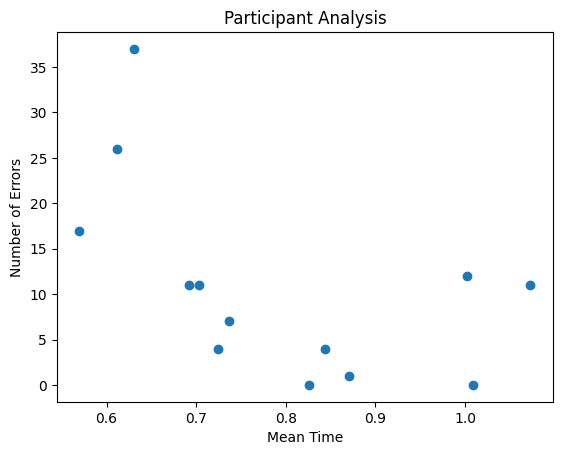

In [16]:
# participant cleaning
i = 0
while i < len(participants):
    participants[i] = participants[i][participants[i]['time'] < 5]
    upper_limit = participants[i]['time'].quantile(0.95)
    participants[i] = participants[i][participants[i]['time'] < upper_limit]
    i += 1

a = []
b = []

# Participant Analysis
for participant in participants:
    print(f"Participant:")
    print(f"Mean time: {round(participant['time'].mean(), 3)}")
    a.append(participant['time'].mean())
    print(f"Standard deviation: {round(participant['time'].std(), 3)}")
    print(f"Number of errors: {participant['errors'].sum()}")
    b.append(participant['errors'].sum())
    print("\n")

# Plotting
plt.scatter(a, b)
plt.title('Participant Analysis')
plt.xlabel('Mean Time')
plt.ylabel('Number of Errors')
plt.show()

# Regression
round(np.corrcoef(a, b)[0, 1] ** 2, 2)

y = 0.88x + 0.8 -- R^2 = 0.95


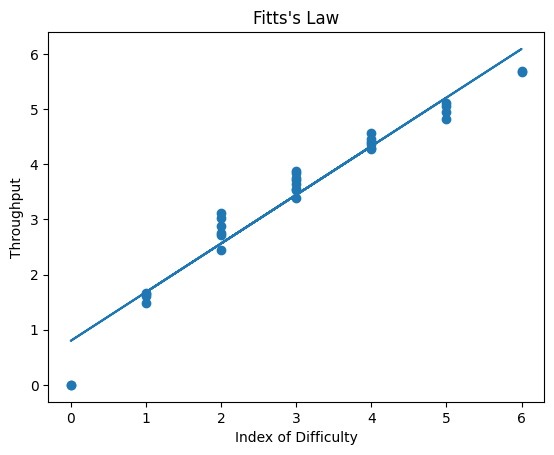

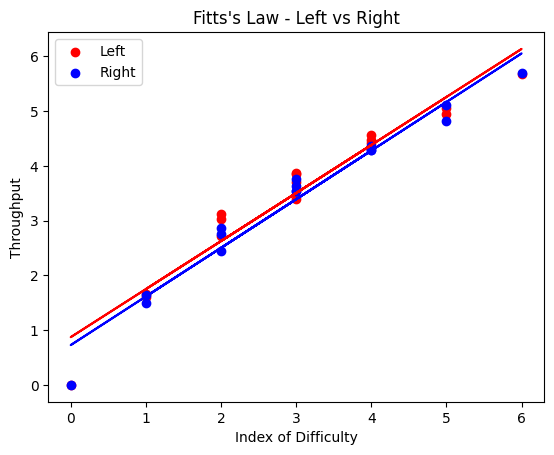

Left: y = 0.88x + 0.87 -- R^2 = 0.94
Right: y = 0.89x + 0.73 -- R^2 = 0.96


In [9]:
# Plot data
plt.scatter(x, y)
plt.xlabel('Index of Difficulty')
plt.ylabel('Throughput')
plt.title('Fitts\'s Law')

# create a linear regression model
m, b = np.polyfit(x, y, 1)
plt.plot(x, [m*i + b for i in x])
print(f"y = {round(m, 2)}x + {round(b, 2)} -- R^2 = {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}")

plt.show()

# plot data for each direction
plt.scatter(x1, y1, label='Left', color='r')
plt.scatter(x2, y2, label='Right', color='b')
plt.xlabel('Index of Difficulty')
plt.ylabel('Throughput')
plt.title('Fitts\'s Law - Left vs Right')
plt.legend()

# create a linear regression model
m1, b1 = np.polyfit(x1, y1, 1)
m2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, [m1*i + b1 for i in x1], color='r')
plt.plot(x2, [m2*i + b2 for i in x2], color='b')
plt.show()

print(f"Left: y = {round(m1, 2)}x + {round(b1, 2)} -- R^2 = {round(np.corrcoef(x1, y1)[0, 1] ** 2, 2)}")
print(f"Right: y = {round(m2, 2)}x + {round(b2, 2)} -- R^2 = {round(np.corrcoef(x2, y2)[0, 1] ** 2, 2)}")